<a href="https://colab.research.google.com/github/Agbeli/Disaster_tweet/blob/main/FAKE_REAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fake or real tweet about disaster 

- This is a sentiment analysis for tweets by people on disaster in the society. 

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/REAL_FAKE"

/content/drive/MyDrive/REAL_FAKE


### Access the dataset from kaggle.

In [ ]:
!pip install -U kaggle
!mkdir .kaggle
import json 
token = {"username":"agbeli","key":"3b71f31817c72c5496c4b1cfba5b3f33"}
with open(".kaggle/kaggle.json","w") as file:
  json.dump(token,file)
!mkdir ~/.kaggle
!cp .kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path /content

     |████████████████████████████████| 61kB 2.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.10-cp36-none-any.whl size=73269 sha256=efec2977993d9e4a379bf775a87e5184ffbb3e7b2b531c9fff0066e1f1b72289
  Stored in directory: /root/.cache/pip/wheels/3a/d1/7e/6ce09b72b770149802c653a02783821629146983ee5a360f10
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list 

ref                                                          title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
alexgude/california-traffic-collision-data-from-switrs       California Traffic Collision Data from SWITRS    1GB  2020-11-22 16:51:55           1500        249  0.9705882        
babyoda/women-entrepreneurship-and-labor-force               Women Entrepreneurship and Labor Force           1KB  2020-11-21 08:38:51           3547        197  1.0              
szymonjanowski/internet-articles-data-with-users-engagement  Internet news data with readers engagement       3MB  2020-11-21 17:09:57           1703         86  0.9411765        
sakshigoyal7/credit-card-customers                           Credit Card customers                  

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 39.0MB/s]


In [ ]:
!unzip  nlp-getting-started.zip > output.txt

In [3]:
!pip install -U nltk
!pip install -U spacy

     |████████████████████████████████| 1.4MB 7.9MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434672 sha256=b196fdc68c6a69f985c43b85d01b9ccc3ae3cea53d828264c18eb7d5cba1eef5
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
     |████████████████████████████████| 10.4MB 7.4MB/s 
     |████████████████████████████████| 1.1MB 45.2MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [4]:
#### import the requisite library. 
import pandas as pd 
import sklearn 
import os 
import numpy as np 
import re 
import collections
from sklearn.feature_extraction.text import CountVectorizer
import string 
import spacy

In [5]:
#### Access the dataset for both train and test set. 
trainset = pd.read_csv("train.csv")
testset = pd.read_csv("test.csv")

In [6]:
trainset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [7]:
testset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### Exploratory Analysis 

- Understanding the nature of the text for the purposes of preprocessing. 
- It always mandatory to check the pattern of the dataset. 

In [8]:
#### check the length of tweet. 
def analyse_longest_tweet(df,category):
  df = df.copy()
  length_sentence = df[df["target"]==category]["text"].str.len()
  return length_sentence

In [9]:
### check for the longest sentence in 
group_0 = analyse_longest_tweet(df = trainset,category=0)
group_1 = analyse_longest_tweet(df = trainset, category=1)

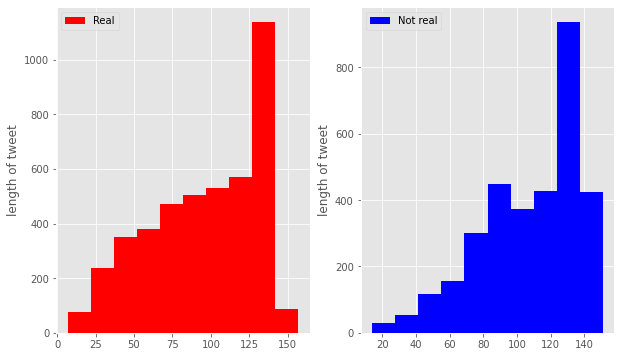

In [10]:
from matplotlib import pyplot as plt 
import seaborn as sns 
plt.style.use("ggplot")

fig , (ax0,ax1) = plt.subplots(1,2,figsize=(10,6))
ax0.hist(group_0,label="Real",color="red")
ax0.set_ylabel("length of tweet")
ax0.legend(loc="best")
ax1.hist(group_1,label="Not real",color="blue")
ax1.set_ylabel("length of tweet")
ax1.legend(loc="best")
plt.show()

In [11]:
### number of words in a tweet....
def analyse_words(df,category=None):
  df = df.copy()
  num_words = df[df["target"]==category]["text"].str.split().apply(lambda x: len(x))
  return num_words

In [12]:
num_group0 = analyse_words(df=trainset,category=0)
num_group1 = analyse_words(df=trainset,category=1)

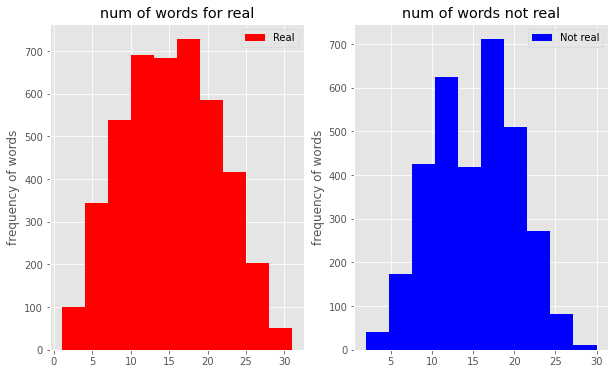

In [13]:
fig , (ax0,ax1) = plt.subplots(1,2,figsize=(10,6))
ax0.hist(num_group0,label="Real",color="red")
ax0.set_ylabel("frequency of words")
ax0.set_title("num of words for real")
ax0.legend(loc="best")
ax1.hist(num_group1,label="Not real",color="blue")
ax1.set_ylabel("frequency of words")
ax1.set_title("num of words not real")
ax1.legend(loc="best")
plt.show()

### Text preprocessing 

In [14]:
import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
from collections import defaultdict
def analyse_corpus(df,category):
  df = df.copy()
  corpus = []
  for sentence in df[df["target"]==category]["text"].str.split():
    for word in sentence:
      corpus.append(word)
  return corpus

group0_corpus = analyse_corpus(df=trainset,category=0)
group1_corpus = analyse_corpus(df=trainset,category=1)

In [16]:
stop_words = defaultdict(int)
for text in group0_corpus:
  if text in stop:
    stop_words[text] += 1

In [17]:
top = sorted(stop_words.items(),key=lambda x : x[1] ,reverse=True)[:10]

In [18]:
word , val = zip(*top)

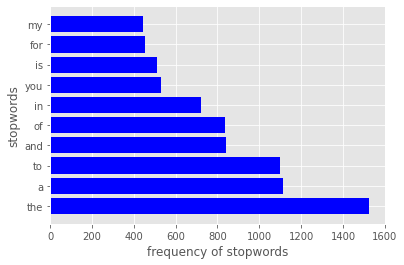

In [19]:
plt.barh(word,val,color="blue")
plt.xlabel("frequency of stopwords")
plt.ylabel("stopwords")
plt.show()

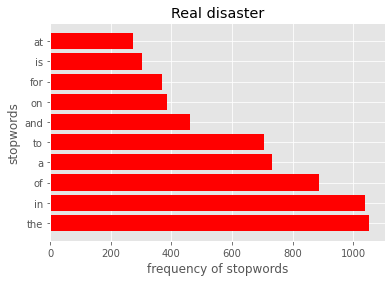

In [20]:
stop_words1 = defaultdict(int)
for text in group1_corpus:
  if text in stop:
    stop_words1[text] += 1
top1 = sorted(stop_words1.items(),key=lambda x : x[1] ,reverse=True)[:10]
word , val = zip(*top1)
plt.barh(word,val,color="red")
plt.xlabel("frequency of stopwords")
plt.title("Real disaster")
plt.ylabel("stopwords")
plt.show()

In [21]:
special = string.punctuation
symb = defaultdict(int)
for text in group0_corpus:
  if text in special:
    symb[text] += 1 
x, y = zip(*symb.items())

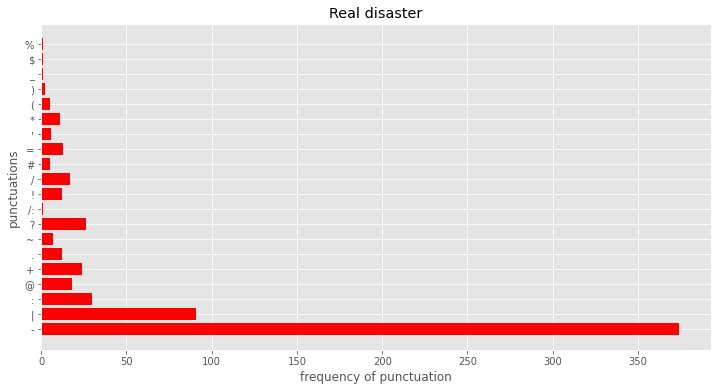

In [22]:
plt.figure(figsize=(12,6))
plt.barh(x,y,color="red")
plt.xlabel("frequency of punctuation")
plt.title("Real disaster")
plt.ylabel("punctuations")
plt.show()

### Text preprocessing and cleaning

- At this stage of our we want to remove any unwanted texts that is not needed in our analysis. 

In [23]:
### remove https
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"                              
                           u"\U00002500-\U00002BEF"  # chinese char                          
                           u"\U0001f926-\U0001f937"
                           u"\U00010000-\U0010ffff"
                           u"\u2640-\u2642"
                           u"\u2600-\u2B55"
                           u"\u200d"
                           u"\u23cf"
                           u"\u23e9"
                           u"\u231a"
                           u"\ufe0f"  # dingbats
                           u"\u3030"   
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

#remove_emoji("Omg another Earthquake 😔😔")
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
def remove_numbers(text):
    text = re.sub('\w*\d\w*', '', text)        
    return text

In [24]:
trainset["text"] = trainset["text"].apply(lambda x:remove_URL(x))
trainset["text"] = trainset["text"].apply(lambda x:remove_html(x))
trainset["text"] = trainset["text"].apply(lambda x:remove_emoji(x))
trainset["text"] = trainset["text"].apply(lambda x:remove_punct(x))
trainset["text"] = trainset["text"].apply(lambda x:remove_numbers(x))

In [25]:
trainset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


In [ ]:
vec = CountVectorizer()
transform_train = vec.fit_transform(trainset["text"])

In [ ]:
new_data = pd.DataFrame(transform_train.toarray(),columns=vec.get_feature_names())

In [ ]:
new_data.head()

,aa,aaaa,aaaaaaallll,aaaaaand,aaarrrgghhh,aaceorg,aampb,aampw,aan,aannnnd,aar,aaronthefm,aashiqui,ab,aba,abandon,abandoned,abandonedpics,abandoning,abbandoned,abbott,abbruchsimulator,abbswinston,abbyairshow,abc,abcnews,abcnorio,abcs,abe,aberdeen,aberdeenfanpage,aberdeenfc,aberystwythshrewsbury,abes,abha,abia,ability,abject,ablaze,able,...,ûïfdny,ûïfor,ûïhannaph,ûïhatchet,ûïi,ûïkeits,ûïleejasper,ûïleoblakecarter,ûïlittle,ûïlolgop,ûïlordbrathwaite,ûïlove,ûïmacdaddyleo,ûïmake,ûïnews,ûïnobody,ûïnumbers,ûïparties,ûïplans,ûïrichmond,ûïsippin,ûïsplottdave,ûïstretcher,ûïthat,ûïthe,ûïthehighfessions,ûïwe,ûïwhen,ûïymcglaun,ûïyou,ûò,ûòthe,ûòåêcnbc,ûó,ûóbbc,ûóher,ûókody,ûónegligence,ûótech,ûówe
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Baseline model (Naive Bayes classifier)

- Naive-base model for classifying the category of tweets by people 

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(new_data,trainset["target"],random_state=100,test_size=0.25)

In [ ]:
### import the neccessary libraries for modelling. 
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import  MLPClassifier
from sklearn.metrics import accuracy_score , precision_score,recall_score

model = MultinomialNB()
model.fit(x_train,y_train)
pred = model.predict(x_train)

In [ ]:
score = accuracy_score(pred,y_train)

In [ ]:
precision_score(pred,y_train)

0.8445072697899838

In [ ]:
recall_score(pred,y_train)

0.9351520572450805

In [ ]:
test_pred = model.predict(x_test)
print("The accuracy score: ",accuracy_score(y_test,test_pred))

The accuracy score:  0.7993697478991597


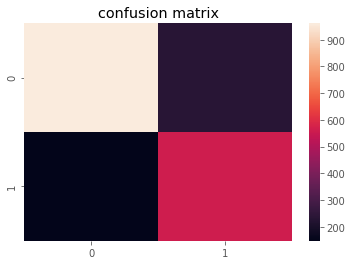

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_pred,y_test))
plt.title("confusion matrix")
plt.show()

### Testset processing for prediction. 

In [26]:
testset.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [27]:
testset["text"] = testset["text"].apply(lambda x:remove_URL(x))
testset["text"] = testset["text"].apply(lambda x:remove_html(x))
testset["text"] = testset["text"].apply(lambda x:remove_emoji(x))
testset["text"] = testset["text"].apply(lambda x:remove_punct(x))
testset["text"] = testset["text"].apply(lambda x:remove_numbers(x))

In [ ]:
transform_test = vec.transform(testset["text"])

In [ ]:
new_test = pd.DataFrame(transform_test.toarray(),columns=vec.get_feature_names())

In [ ]:
target = model.predict(new_test)

In [ ]:
target

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
submit = pd.read_csv("sample_submission.csv")

In [ ]:
submit["target"] = target

In [ ]:
submit.head()

,id,target
0,0,1
1,2,0
2,3,1
3,9,1
4,11,1


In [ ]:
submit.to_csv("submission.csv",index=False)

### Transformer model 

- I want to consider the performance of a transformer model for my problem. To evaluate the level of accuracy of the model.

- This pretrained language model trained on large text and now we want to fine-tune the model to suit our current work. 

In [28]:
### install pretrained models and frameworks. 
!pip install torch
!pip install transformers

     |████████████████████████████████| 1.5MB 7.4MB/s 
     |████████████████████████████████| 2.9MB 27.7MB/s 
     |████████████████████████████████| 890kB 50.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=3896948c96e96f80f82fa09b5a3ce4745acf0cc1b7c5ee14c3d283d15944cac5
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [29]:
### build bert uncased model. 
### first have to build model
import transformers 
import torch.nn as nn 
import torch 
from tqdm import tqdm
from sklearn import model_selection
from sklearn import metrics
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup
from transformers import BertTokenizer
from transformers import BertModel
from transformers import BertConfig

In [47]:
##### define variables 
MAX_Len = 512 
TRAIN_BATCH_SIZE =8 
VALID_BATCH_SIZE = 4
BERT_PATH = 'bert-base-uncased'
TOKENZIER = BertTokenizer.from_pretrained(BERT_PATH ,do_lower_case = True)

### Bert Uncased model

- At this point, I have to define bert uncased model considering a pretrained model. I have to finetune the model to suit problem I want to solve. 
- Consider a dropout at training time and on top of that I added a linear layer to predict the final output. 

In [48]:
### Define the bert uncased model using the uncased tokernizer.#### 
###################################################################
class BertBaseUncased(nn.Module) :
    def __init__(self) : 
        super(BertBaseUncased,self).__init__() 
        #self.config = BertConfig.from_pretrained('bert-base-uncased', 
         #                                        output_hidden_states=False, 
          #                                       output_attentions=False) 
        self.bert = BertModel.from_pretrained(BERT_PATH) 
        self.bert_drop = nn.Dropout(0.4) 
        self.out = nn.Linear(768,1) 

    def forward(self,ids,mask,token_type_ids) : 
        _ ,out2 = self.bert( 
            ids , 
            attention_mask = mask , 
            token_type_ids = token_type_ids,
            return_dict=False
        )
        bo = self.bert_drop(out2) 
        output = self.out(bo) 
        return output 

In [32]:
trainset.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this earthquake Ma...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask Canada,1
2,5,NaN,NaN,All residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,Just got sent this photo from Ruby Alaska as s...,1


### Define BertDataset loading 

- Here I defined how the dataset should be loaded for prediction. 
- I have to pass a clean dataset and after that tokenize using the Bert tokenizer to suit the model I am using for this problem. 

In [49]:
class BERTDataset : 
    def __init__(self,df) : 
        
        self.text = df['text'].values
        self.target = df['target'].values 
        self.tokenizer = TOKENZIER 
        self.max_len = MAX_Len 
    def __len__(self) : 
        return len(self.text) 
    def __getitem__(self, item):
        text = str(self.text[item])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
                text,
                None,
                add_special_tokens=True,
                max_length=self.max_len,
                truncation = True
            )

        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]

        padding_length = self.max_len - len(ids)
        ids = ids + ([0] * padding_length)
        mask = mask + ([0] * padding_length)
        token_type_ids = token_type_ids + ([0] * padding_length)

        return {
                'ids': torch.tensor(ids, dtype=torch.long),
                'mask': torch.tensor(mask, dtype=torch.long),
                'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
                'label': torch.tensor(self.target[item], dtype=torch.float)
            }

### Define Criterion function 

- Binary Crossentropy loss for measuring the discrepancy between the predicted and actual label. 

In [34]:
def loss_fn(outputs, targets):
    return nn.BCEWithLogitsLoss()(outputs, targets.view(-1, 1))

In [35]:
def train_fn(data_loader, model, optimizer, scheduler):
    model.train()

    for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
        ids = d["ids"]
        token_type_ids = d["token_type_ids"]
        mask = d["mask"]
        targets = d["label"]

        ids = ids.to(device, dtype=torch.long)
        token_type_ids = token_type_ids.to(device, dtype=torch.long)
        mask = mask.to(device, dtype=torch.long)
        targets = targets.to(device, dtype=torch.float)

        optimizer.zero_grad()
        outputs = model(
            ids=ids,
            mask=mask,
            token_type_ids=token_type_ids
        )

        loss = loss_fn(outputs, targets)
        loss.backward()
        optimizer.step()
       

In [36]:
 def eval_fn(data_loader, model):
    model.eval()
    fin_targets = []
    fin_outputs = []
    with torch.no_grad():
        for bi, d in tqdm(enumerate(data_loader), total=len(data_loader)):
            ids = d["ids"]
            token_type_ids = d["token_type_ids"]
            mask = d["mask"]
            targets = d["label"]

            ids = ids.to(device, dtype=torch.long)
            token_type_ids = token_type_ids.to(device, dtype=torch.long)
            mask = mask.to(device, dtype=torch.long)
            targets = targets.to(device, dtype=torch.float)

            outputs = model(
                ids=ids,
                mask=mask,
                token_type_ids=token_type_ids
            )
            fin_targets.extend(targets.cpu().detach().numpy().tolist())
            fin_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    return fin_outputs, fin_targets

### Define a run function

In [59]:
trainset.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [60]:
from sklearn.model_selection import StratifiedKFold

#### KFold  crossvalidation 
df = trainset
df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop=True)
kf = StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df, y=df.target.values)):
  print(len(trn_), len(val_))
  df.loc[val_, 'kfold'] = fold

df.to_csv("train_folds.csv", index=False)

6090 1523
6090 1523
6090 1523
6091 1522
6091 1522


In [61]:
DEVICE =torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
def run(model,EPOCHS,fold):

    dfx = pd.read_csv("train_folds.csv")
    df_train = dfx[dfx.kfold != fold].reset_index(drop=True)
    df_valid = dfx[dfx.kfold == fold].reset_index(drop=True)

    train_dataset = BERTDataset(
        df_train
    )

    train_data_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=TRAIN_BATCH_SIZE,
        num_workers=4
    )

    valid_dataset = BERTDataset(
        df_valid

    )

    valid_data_loader = torch.utils.data.DataLoader(
        valid_dataset,
        batch_size=VALID_BATCH_SIZE,
        num_workers=1
    )

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    
    param_optimizer = list(model.named_parameters())
    no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
    optimizer_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.001},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0},
    ]

    num_train_steps = int(len(train_data_loader)) * EPOCHS
    optimizer = AdamW(optimizer_parameters, lr=1e-5)
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=num_train_steps
    )


    best_accuracy = None
    for epoch in range(EPOCHS):
        train_fn(train_data_loader, model, optimizer, scheduler)
        outputs, targets = eval_fn(valid_data_loader, model)
        scheduler.step()
        outputs = np.array(outputs) >= 0.5
        accuracy = metrics.accuracy_score(targets, outputs)
        print(f"{fold} | Epoch: {epoch + 1}/{EPOCHS} | Accuracy Score = {accuracy}")
        if best_accuracy is None:
          best_accuracy = accuracy
          torch.save(model.state_dict(), "bert.bin")
        elif accuracy < best_accuracy + 0.01:
          print("Early stopping of training")
          break
        else:
          best_accuracy = accuracy
          torch.save(model.state_dict(), "bert.bin")
          

### Train and Evaluate the model

- I had to consider implementing cross-validation to train the model different set of trainset where I had to split part training and the other for validation. 

In [62]:
model = BertBaseUncased()
model.to(device)
getattr(tqdm, '_instances', {}).clear()
for i in range(5):
  run(model,3,fold=i)

100%|██████████| 381/381 [01:03<00:00,  6.01it/s]


0 | Epoch: 1/3 | Accuracy Score = 0.8292843072882469


100%|██████████| 381/381 [01:03<00:00,  6.00it/s]

0 | Epoch: 2/3 | Accuracy Score = 0.8332239001969797
Early stopping of training



100%|██████████| 381/381 [01:03<00:00,  6.00it/s]


1 | Epoch: 1/3 | Accuracy Score = 0.8975705843729481


100%|██████████| 381/381 [01:03<00:00,  5.99it/s]

1 | Epoch: 2/3 | Accuracy Score = 0.8896913985554826
Early stopping of training



100%|██████████| 381/381 [01:03<00:00,  6.01it/s]


2 | Epoch: 1/3 | Accuracy Score = 0.9468154957321077


100%|██████████| 381/381 [01:03<00:00,  5.98it/s]

2 | Epoch: 2/3 | Accuracy Score = 0.9487852921864741
Early stopping of training



100%|██████████| 381/381 [01:03<00:00,  6.03it/s]


3 | Epoch: 1/3 | Accuracy Score = 0.9678055190538765


100%|██████████| 381/381 [01:03<00:00,  6.03it/s]

3 | Epoch: 2/3 | Accuracy Score = 0.9645203679369251
Early stopping of training



100%|██████████| 381/381 [01:03<00:00,  6.01it/s]


4 | Epoch: 1/3 | Accuracy Score = 0.9750328515111695


100%|██████████| 381/381 [01:03<00:00,  6.01it/s]

4 | Epoch: 2/3 | Accuracy Score = 0.9625492772667543
Early stopping of training


In [83]:
def sentence_prediction(sentence):
    tokenizer = TOKENZIER
    max_len = MAX_Len
    text = str(sentence)
    text = " ".join(text.split())

    inputs = tokenizer.encode_plus(
        text,
        None,
        add_special_tokens=True,
        max_length=max_len,
        truncation = True
    )

    ids = inputs["input_ids"]
    mask = inputs["attention_mask"]
    token_type_ids = inputs["token_type_ids"]

    padding_length = max_len - len(ids)
    ids = ids + ([0] * padding_length)
    mask = mask + ([0] * padding_length)
    token_type_ids = token_type_ids + ([0] * padding_length)

    ids = torch.tensor(ids, dtype=torch.long).unsqueeze(0)
    mask = torch.tensor(mask, dtype=torch.long).unsqueeze(0)
    token_type_ids = torch.tensor(token_type_ids, dtype=torch.long).unsqueeze(0)

    ids = ids.to(DEVICE, dtype=torch.long)
    token_type_ids = token_type_ids.to(DEVICE, dtype=torch.long)
    mask = mask.to(DEVICE, dtype=torch.long)

    outputs = model(
        ids=ids,
        mask=mask,
        token_type_ids=token_type_ids
    )

    outputs = torch.sigmoid(outputs).cpu().detach().numpy()
    return outputs[0][0]


In [84]:
test = testset
print("--------START PREDICTING---------")
test['target'] = test['text'].apply(sentence_prediction)
print("--------FINISHED!!!--------------")

--------START PREDICTING---------
--------FINISHED!!!--------------


In [82]:
model.load_state_dict(torch.load("bert.bin"))

<All keys matched successfully>

In [42]:
test.head(2)

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,0.998524
1,2,NaN,NaN,Heard about earthquake is different cities sta...,0.998702


In [85]:
submit = pd.read_csv("sample_submission.csv")

In [86]:
submit["target"] = test["target"].round().astype("int")

In [79]:
submit.head(5)

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


### save the predicted outcome. 

- Save into csvfile for submission.

In [87]:
submit.to_csv("Submission3.csv",index=False)